In [20]:
%matplotlib inline

In [77]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import json

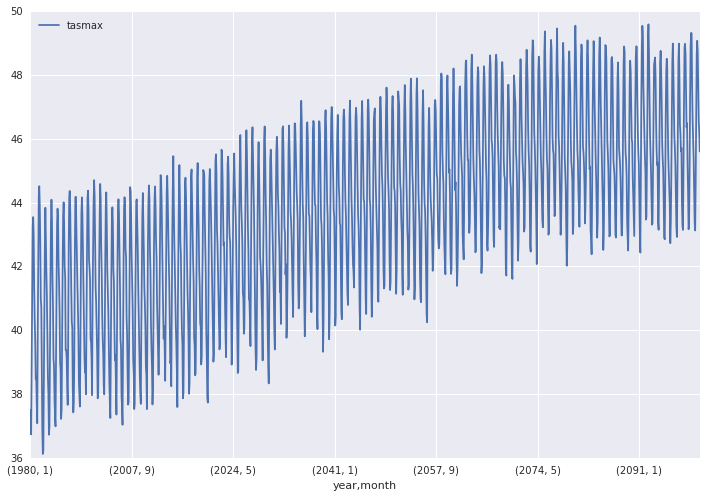

In [59]:
ax = pd.read_csv("/home/spark/tasmax_historical_rcp45_MIROC-ESM_.csv",
                 names=["year", "month", "tasmax"], 
                 dtype={"year": np.int32, 
                        "month": np.int32,
                        "tasmax": np.float64})\
.sort_values(["year", "month"])\
.set_index(["year", "month"])\
.apply(lambda x: x * (9/5.) - 459.67)\
.plot(figsize=(12., 8.))

In [79]:
r = requests.get("http://172.31.5.210:18080/api/v1/applications/app-20151228142201-0030/stages/0")
log = r.json()[0]

with open("data/tasmax_historical_rcp45_MIROC-ESM__stage_0_log.json", "w") as fh:
    fh.write(json.dumps(log))

log.keys()

[u'shuffleReadBytes',
 u'tasks',
 u'executorSummary',
 u'attemptId',
 u'inputRecords',
 u'shuffleWriteBytes',
 u'details',
 u'diskBytesSpilled',
 u'outputRecords',
 u'executorRunTime',
 u'status',
 u'shuffleReadRecords',
 u'schedulingPool',
 u'memoryBytesSpilled',
 u'accumulatorUpdates',
 u'numActiveTasks',
 u'numCompleteTasks',
 u'outputBytes',
 u'numFailedTasks',
 u'name',
 u'inputBytes',
 u'shuffleWriteRecords',
 u'stageId']

In [83]:
r = requests.get("http://172.31.5.210:18080/api/v1/applications/app-20151228142201-0030/stages/1")
stage1 = r.json()[0]

with open("data/tasmax_historical_rcp45_MIROC-ESM__stage_1_log.json", "w") as fh:
    fh.write(json.dumps(stage1))

In [36]:
columns = ['executorId', 
           'attempt',
           'taskId',
           'launchTime',
           'executorDeserializeTime',
           'executorRunTime',
           'bytesRead',
           'recordsRead',
           'jvmGcTime',
           'memoryBytesSpilled',
           'resultSerializationTime',
           'resultSize',
           'bytesWritten',
           'recordsWritten',
           'writeTime']

def parse_task(t):
    return (t['executorId'], 
            t['attempt'],
            t['taskId'],
            t['launchTime'], 
            t['taskMetrics']['executorDeserializeTime'],
            t['taskMetrics']['executorRunTime'],
            t['taskMetrics']['inputMetrics']['bytesRead'],
            t['taskMetrics']['inputMetrics']['recordsRead'],
            t['taskMetrics']['jvmGcTime'],
            t['taskMetrics']['memoryBytesSpilled'],
            t['taskMetrics']['resultSerializationTime'],
            t['taskMetrics']['resultSize'],
            t['taskMetrics']['shuffleWriteMetrics']['bytesWritten'],
            t['taskMetrics']['shuffleWriteMetrics']['recordsWritten'],
            t['taskMetrics']['shuffleWriteMetrics']['writeTime'])
            
stage0 = pd.DataFrame([parse_task(t) for k,t in log['tasks'].items()], columns=columns)

In [45]:
stage0['attempt'].value_counts()

0    550
Name: attempt, dtype: int64

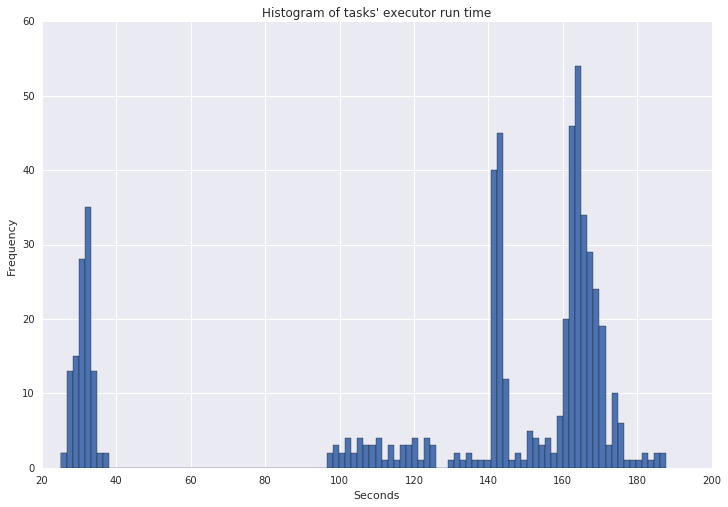

In [60]:
title = "Histogram of tasks' executor run time"
ax = stage0['executorRunTime'].apply(lambda x: x / 1000.).plot(kind="hist", bins=100, figsize=(12., 8.), title=title)
ax.set_xlabel("Seconds")

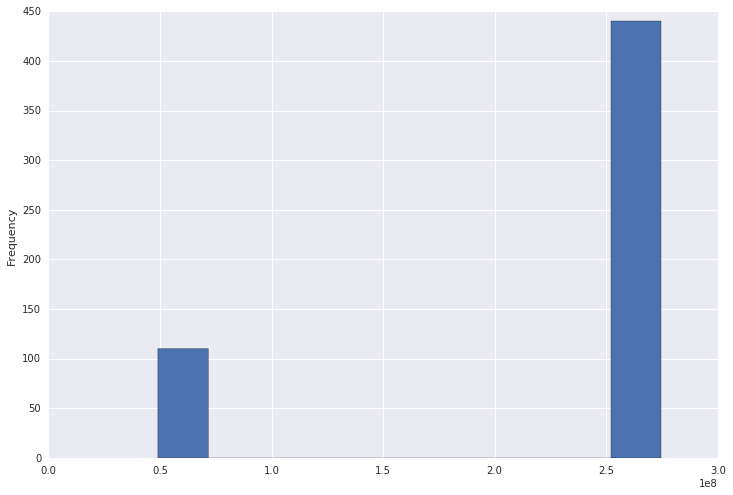

In [61]:
stage0['bytesRead'].plot(kind="hist", bins=10, figsize=(12., 8.))

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


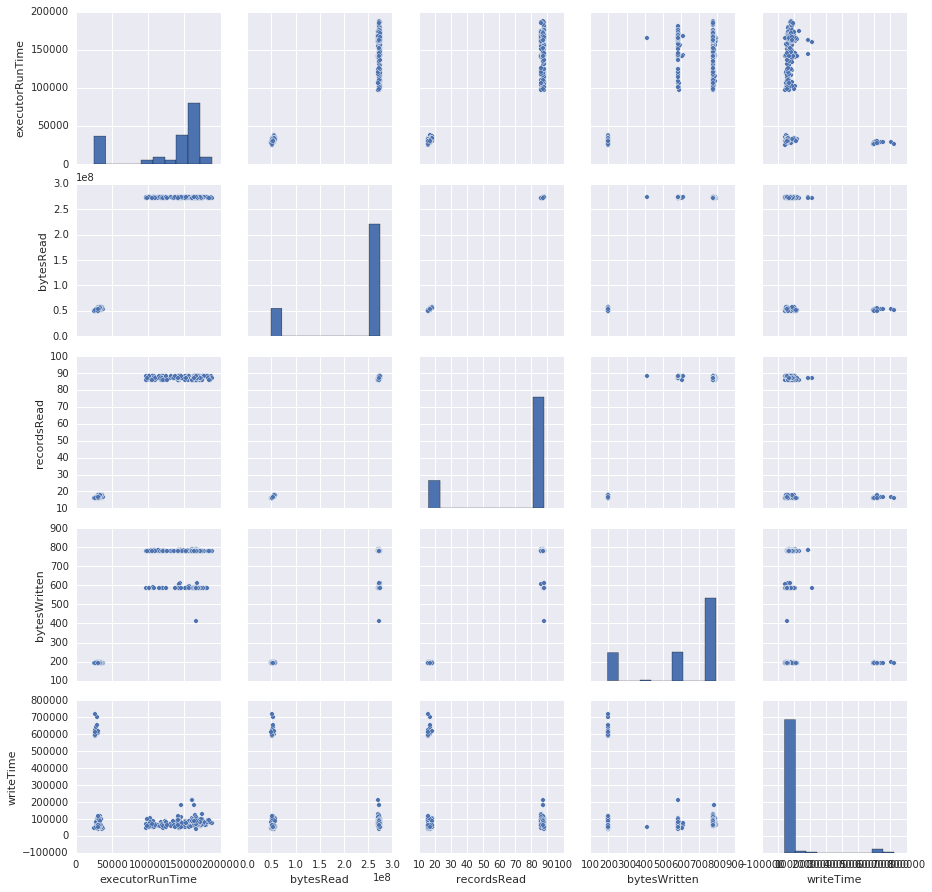

In [63]:
sns.pairplot(stage0[['executorRunTime', 'bytesRead', 'recordsRead', 'bytesWritten', 'writeTime']])

In [70]:
stage0.sort_values("writeTime", ascending=False)

,executorId,attempt,taskId,launchTime,executorDeserializeTime,executorRunTime,bytesRead,recordsRead,jvmGcTime,memoryBytesSpilled,resultSerializationTime,resultSize,bytesWritten,recordsWritten,writeTime
523,1,0,44,2015-12-28T14:22:03.660GMT,1111,26763,50910157,16,107,0,0,2811,195,1,720746
254,5,0,19,2015-12-28T14:22:03.646GMT,1817,28576,52851673,17,107,0,1,2807,196,1,704838
520,15,0,49,2015-12-28T14:22:03.663GMT,1250,29410,53139432,17,138,0,1,2812,195,1,652511
286,4,0,79,2015-12-28T14:22:03.685GMT,1059,28444,53000337,17,139,0,1,2811,195,1,642181
281,0,0,74,2015-12-28T14:22:03.680GMT,1276,26983,50718005,16,98,0,1,2811,195,1,624548
309,8,0,69,2015-12-28T14:22:03.676GMT,1843,30053,55841060,18,115,0,1,2807,195,1,618992
70,10,0,39,2015-12-28T14:22:03.658GMT,1213,27278,50881586,16,107,0,1,2812,195,1,617030
149,7,0,24,2015-12-28T14:22:03.649GMT,1512,27090,52158114,16,99,0,0,2811,195,1,615830
446,6,0,54,2015-12-28T14:22:03.666GMT,10685,26955,49099785,16,113,0,1,2811,195,1,615115
193,2,0,84,2015-12-28T14:22:03.688GMT,790,30784,52823458,17,262,0,0,2807,195,1,609997


In [71]:
stage0.to_csv("data/tasmax_historical_rcp45_MIROC-ESM__tasks.csv", index=False)